In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

plt.style.use('ggplot')

In [3]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-sjakaev-22/half_project/' #path to home folder

INITIAL DATA READ AND CLEANUP

olist_customers_datase.csv — table with unique customers id
customer_id — visible customer id
customer_unique_id —  unique customer id
customer_zip_code_prefix —  zip code
customer_city —  delivery city
customer_state —  delivery state

In [5]:
customer_path = path +'olist_customers_dataset.csv' #concat path to file
df_customers = pd.read_csv(customer_path,converters={'customer_zip_code_prefix': lambda x: str(x)})#keep zip codes as strings to keep leading zeros
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

  customer_zip_code_prefix          customer_city customer_state  
0                    14409                 franca             SP  
1                    09790  sao bernardo do campo             SP  
2                    01151              sao paulo             SP  
3                    08775        mogi das cruzes             SP  
4                    13056               campinas             SP

In [6]:
df_customers.customer_id.count() - df_customers.customer_id.nunique()

0

In [7]:
df_customers.customer_unique_id.count() - df_customers.customer_unique_id.nunique()
#one unique customer id have multiple regular customer ids

3345

In [8]:
df_customers.groupby('customer_id', as_index = False).agg({'customer_unique_id':'count'}).query('customer_unique_id > 1')
#check if there are multiple entries of customer_unique_ids for one customer_id - looks like no
df_customers.groupby('customer_unique_id', as_index = False).agg({'customer_id':'count'}).query('customer_id > 1')
#and there is almost 3k unique_ids having multiple regular_ids, which means one user can have multiple ids in other tables


customer_unique_id  customer_id
33     00172711b30d52eea8b313a7f2cced02            2
106    004288347e5e88a27ded2bb23747066c            2
124    004b45ec5c64187465168251cd1c9c2f            2
144    0058f300f57d7b93c477a131a59b36c3            2
249    00a39521eb40f7012db50455bf083460            2
...                                 ...          ...
95784  ff36be26206fffe1eb37afd54c70e18b            3
95810  ff44401d0d8f5b9c54a47374eb48c1b8            2
95916  ff8892f7c26aa0446da53d01b18df463            2
95934  ff922bdd6bafcdf99cb90d7f39cea5b3            3
96050  ffe254cc039740e17dd15a5305035928            2

[2997 rows x 2 columns]

In [9]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


olist_orders_dataset.csv —  orders table
order_id —  order unique id
customer_id —  visible customer id
order_status —  order state
order_purchase_timestamp —  order purchase timestamp
order_approved_at —  timestamp of order approved
order_delivered_carrier_date —  timestamp of order being transfered to carrier
order_delivered_customer_date —  timestamp of delivery
order_estimated_delivery_date —  estimated delivery time

In [10]:
orders_path = path + 'olist_orders_dataset.csv'
df_orders = pd.read_csv(orders_path, parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [11]:
df_orders.describe()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence thi

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     3a43013148c91141e56e105f93fb3792  d367c5c78d7c17bff967e788d84518d1   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-03-31 15:08:21  2018-02-27 04:31:10   
freq          96478                        3                    9   
first           NaN      2016-09-04 21:15:19  2016-09-15 12:16:38   
last            NaN      2018-10-17 17:30:18  2018-09-03 17:40:06   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-14 20:02:44   
freq                             47                             3   
first           2016-10-08 10:34:01           2016-10-11 13:46:32   
last            2018-09-11 19:48:28           2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522  
first            2016-09-30 00:00:00  
last             2018-11-12 00:00:00

max aproved date is lesser than max delivered date - meaning that order some orders where not approved but already delivered?

In [13]:
df_orders.info() #check for na entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [14]:
df_orders.order_id.nunique()

#order ids are unique - success

99441

In [15]:
list_customer_ids = df_customers.customer_id.unique().tolist()
df_orders.query('customer_id not in @list_customer_ids')
#check if all customer ids in orders have a corresponding id in customer list - success

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []

In [16]:
order_status = df_orders.order_status.unique() #not unexpected statuses found
order_status

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [17]:
order_status_g = ['approved','shipped','processing','delivered']
#we will count this orders as succesfull purchase as we recieved a payment

In [18]:
df_orders.query('order_status == "delivered" and order_delivered_customer_date.isnull() == True')
#there is not many such entries(8) - probably there is no takeout option - just a bug in a process. such entries should be deleted.

order_id                       customer_id  \
3002   2d1e2d5bf4dc7227b3bfebb81328c15f  ec05a6d8558c6455f0cbbd8a420ad34f   
20618  f5dd62b788049ad9fc0526e3ad11a097  5e89028e024b381dc84a13a3570decb4   
43834  2ebdfc4f15f23b91474edf87475f108e  29f0540231702fda0cfdee0a310f11aa   
79263  e69f75a717d64fc5ecdfae42b2e8e086  cfda40ca8dd0a5d486a9635b611b398a   
82868  0d3268bad9b086af767785e3f0fc0133  4f1d63d35fb7c8999853b2699f5c7649   
92643  2d858f451373b04fb5c984a1cc2defaf  e08caf668d499a6d643dafd7c5cc498a   
97647  ab7c89dc1bf4a1ead9d6ec1ec8968a84  dd1b84a7286eb4524d52af4256c0ba24   
98038  20edc82cf5400ce95e1afacc25798b31  28c37425f1127d887d7337f284080a0f   

      order_status order_purchase_timestamp   order_approved_at  \
3002     delivered      2017-11-28 17:44:07 2017-11-28 17:56:40   
20618    delivered      2018-06-20 06:58:43 2018-06-20 07:19:05   
43834    delivered      2018-07-01 17:05:11 2018-07-01 17:15:12   
79263    delivered      2018-07-01 22:05:55 2018-07-01 22:15:14   
82868    delivered      2018-07-01 21:14:02 2018-07-01 21:29:54   
92643    delivered      2017-05-25 23:22:43 2017-05-25 23:30:16   
97647    delivered      2018-06-08 12:09:39 2018-06-08 12:36:39   
98038    delivered      2018-06-27 16:09:12 2018-06-27 16:29:30   

      order_delivered_carrier_date order_delivered_customer_date  \
3002           2017-11-30 18:12:23                           NaT   
20618          2018-06-25 08:05:00                           NaT   
43834          2018-07-03 13:57:00                           NaT   
79263          2018-07-03 13:57:00                           NaT   
82868          2018-07-03 09:28:00                           NaT   
92643                          NaT                           NaT   
97647          2018-06-12 14:10:00                           NaT   
98038          2018-07-03 19:26:00                           NaT   

      order_estimated_delivery_date  
3002                     2017-12-18  
20618                    2018-07-16  
43834                    2018-07-30  
79263                    2018-07-30  
82868                    2018-07-24  
92643                    2017-06-23  
97647                    2018-06-26  
98038                    2018-07-19

In [19]:
df_orders = df_orders.query('not (order_status == "delivered" and order_delivered_customer_date.isnull() == True)')
#rewrite the df excluding such entries
df_orders.shape #check that only 8 entries deleted - OK

(99433, 8)

In [20]:
df_orders.query('order_status == "approved" and order_approved_at.isnull() == True').count()
#approved column seems to have no such errors

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [21]:
df_orders.query('order_status == "shipped" and order_delivered_carrier_date.isnull() == True').count()
#shipped seems to be OK as well

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

olist_order_items_dataset.csv —  detailed orders table
order_id —  unique order id
order_item_id —  item id inside of each order
product_id —  unique product id
seller_id — unique manufacturer id
shipping_limit_date —  shipping time limit
price —  price for each item
freight_value —  how much each item weights

In [22]:
path_items = path + 'olist_order_items_dataset.csv'
df_oitems = pd.read_csv(path_items,parse_dates = ['shipping_limit_date'])
df_oitems

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
2      2018-01-18 14:48:30  199.00          17.87  
3      2018-08-15 10:10:18   12.99          12.79  
4      2017-02-13 13:57:51  199.90          18.14  
...                    ...     ...            ...  
112645 2018-05-02 04:11:01  299.99          43.41  
112646 2018-07-20 04:31:48  350.00          36.53  
112647 2017-10-30 17:14:25   99.90          16.95  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [23]:
df_oitems.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [24]:
list_orders_ids = df_orders.order_id.unique().tolist() 
df_oitemes = df_oitems.query('order_id in @list_orders_ids') #delete previously cleaned up order id
df_oitems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14


Initial data prepation finished


How many users make only one purchase?

In [26]:
df_customers_id = df_customers[['customer_id','customer_unique_id']] #make a smaller df with unique customer ids
df_customers_id

customer_id                customer_unique_id
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066
...                                 ...                               ...
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398

[99441 rows x 2 columns]

In [27]:
df_orders = pd.merge(
    df_orders,
    df_customers_id,
    how="left",
    on="customer_id"
)
#merge orders with unique customer ids

In [28]:
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff  
1                    2018-08-13  af07308b275d755c9edb36a90c618231  
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8  
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977  
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6

In [29]:
df_orders.query('order_status in @order_status_g')\
        .groupby('customer_unique_id',as_index = False)\
        .agg({'order_id':'count'})\
        .rename(columns ={"order_id":'order_number'})\
        .query('order_number  > 1')\
        .count()
#number is roughly the same as number of unique_user_ids having more than one user id
#meaing each new order probably have a separate user id created


customer_unique_id    2872
order_number          2872
dtype: int64

In [64]:
df_orders.query('order_status in @order_status_g')\
        .groupby('customer_unique_id',as_index = False)\
        .agg({'order_id':'count'})\
        .rename(columns ={"order_id":'order_quantity'})\
        .query('order_quantity  == 1')\
        .count()[0]
#most of the users made only one purchase 91808 out of 99441

91808

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1da73d278>]],
      dtype=object)

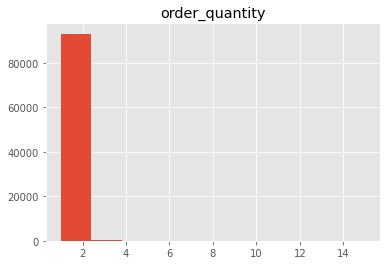

In [31]:
df_orders.query('order_status == "delivered"')\
        .groupby('customer_unique_id',as_index = False)\
        .agg({'order_id':'count'})\
        .rename(columns ={"order_id":'order_quantity'}).hist()

How many orders are not delivered each month show detalization on reasons why?

In [80]:
time_now = df_orders.order_purchase_timestamp.max() + dt.timedelta(days = 1)
df_orders_nd_by_month = df_orders.query('order_status not in @order_status_g and order_estimated_delivery_date < @time_now')\
        .groupby([pd.Grouper(key = 'order_purchase_timestamp',freq='M'),'order_status'])\
        .agg({'order_id':'count'})\
        .sort_values('order_purchase_timestamp')\
        .reset_index()\
        .rename(columns = {'order_purchase_timestamp' : 'purchase_month','order_id':'order_count'})
#select all orders with status not delivered which should be delivered to current date
#(we will count a date dataframe supposedly was extracted as curent)
#group by purchase date timestamp month and order status
#reset the indexes to flatten the table for easier visualization

In [81]:
df_orders_nd_by_month

purchase_month order_status  order_count
0      2016-09-30     canceled            2
1      2016-10-31     canceled           24
2      2016-10-31     invoiced           18
3      2016-10-31  unavailable            7
4      2017-01-31     canceled            3
..            ...          ...          ...
64     2018-08-31     invoiced           23
65     2018-08-31     canceled           84
66     2018-08-31  unavailable            7
67     2018-09-30     canceled           14
68     2018-10-31     canceled            1

[69 rows x 3 columns]

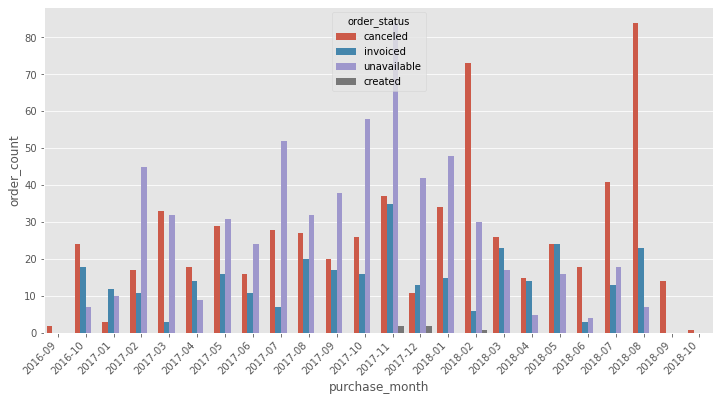

In [82]:
fig, ax = plt.subplots(figsize = (12,6))#set fig size to be able to see the plot properly
fig = sns.barplot(x = 'purchase_month', y = 'order_count', hue = 'order_status', data = df_orders_nd_by_month) #crete plot
x_dates = df_orders_nd_by_month['purchase_month'].dt.strftime('%Y-%m').sort_values().unique() # set plot ticks to year-month format to avoid longer labels
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.show()
#graph shows that out of all orders not yet main reasons are "unavailable" or "canceled"
#looks like orders lost either by shipping company or warehouse staff
#someone should think about invoices as well

For each product find out on which day of the week it is being bought more

In [83]:
df_oitems.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [84]:
df_orders_date = df_orders[['order_id','order_purchase_timestamp','customer_unique_id']]

In [85]:
#merge order and items inside this orders to get the product_id and purchase timestamp relation
df_oitems_date = pd.merge(
    df_oitems,
    df_orders_date,
    how="left",
    on="order_id"
)

In [86]:
#prepare dataset by grouping it by product id and weekday
df_oitems_date= df_oitems_date\
            .groupby(['product_id',df_oitems_date['order_purchase_timestamp'].dt.day_name()])\
            .agg({'order_id':'count'})\
            .reset_index()\
            .rename(columns = {'order_id':'order_count'})


In [87]:
#perform a selection of highest weekday by product
df_oitems_date = df_oitems_date.loc[df_oitems_date.groupby('product_id')['order_count'].idxmax()][['product_id','order_purchase_timestamp','order_count']]
df_oitems_date.head()

product_id order_purchase_timestamp  order_count
0  00066f42aeeb9f3007548bb9d3f33c38                   Sunday            1
1  00088930e925c41fd95ebfe695fd2655                  Tuesday            1
2  0009406fd7479715e4bef61dd91f2462                 Thursday            1
3  000b8f95fcb9e0096488278317764d19                   Friday            1
5  000d9be29b5207b54e86aa1b1ac54872                  Tuesday            1


For each user how many purchases there are weekly(per month)?



In [88]:
#df_orders already have unique user ids so we can use it without much other transformation
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff  
1                    2018-08-13  af07308b275d755c9edb36a90c618231  
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8  
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977  
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6

In [89]:
#find quantity of orders per user each month
df_order_pmonth = df_orders.groupby(['customer_unique_id', pd.Grouper(key = 'order_purchase_timestamp',freq='M')])\
        .agg({'order_id':'count'})\
        .reset_index()
df_order_pmonth

customer_unique_id order_purchase_timestamp  order_id
0      0000366f3b9a7992bf8c76cfdf3221e2               2018-05-31         1
1      0000b849f77a49e4a4ce2b2a4ca5be3f               2018-05-31         1
2      0000f46a3911fa3c0805444483337064               2017-03-31         1
3      0000f6ccb0745a6a4b88665a16c9f078               2017-10-31         1
4      0004aac84e0df4da2b147fca70cf8255               2017-11-30         1
...                                 ...                      ...       ...
98033  fffcf5a5ff07b0908bd4e2dbc735a684               2017-06-30         1
98034  fffea47cd6d3cc0a88bd621562a9d061               2017-12-31         1
98035  ffff371b4d645b6ecea244b27531430a               2017-02-28         1
98036  ffff5962728ec6157033ef9805bacc48               2018-05-31         1
98037  ffffd2657e2aad2907e67c3e9daecbeb               2017-05-31         1

[98038 rows x 3 columns]

In [90]:
#find out how many days there are in each month
df_order_pmonth = df_order_pmonth.assign(days_per_month=lambda x: (x['order_purchase_timestamp'].dt.days_in_month))
#get per week average by dividing amount of purchases this month to amount of weeks this month
df_order_pmonth['mean_per_week'] = df_order_pmonth.order_id/(df_order_pmonth.days_per_month/7)
df_order_pmonth

customer_unique_id order_purchase_timestamp  order_id  \
0      0000366f3b9a7992bf8c76cfdf3221e2               2018-05-31         1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f               2018-05-31         1   
2      0000f46a3911fa3c0805444483337064               2017-03-31         1   
3      0000f6ccb0745a6a4b88665a16c9f078               2017-10-31         1   
4      0004aac84e0df4da2b147fca70cf8255               2017-11-30         1   
...                                 ...                      ...       ...   
98033  fffcf5a5ff07b0908bd4e2dbc735a684               2017-06-30         1   
98034  fffea47cd6d3cc0a88bd621562a9d061               2017-12-31         1   
98035  ffff371b4d645b6ecea244b27531430a               2017-02-28         1   
98036  ffff5962728ec6157033ef9805bacc48               2018-05-31         1   
98037  ffffd2657e2aad2907e67c3e9daecbeb               2017-05-31         1   

       days_per_month  mean_per_week  
0                  31       0.225806  
1                  31       0.225806  
2                  31       0.225806  
3                  31       0.225806  
4                  30       0.233333  
...               ...            ...  
98033              30       0.233333  
98034              31       0.225806  
98035              28       0.250000  
98036              31       0.225806  
98037              31       0.225806  

[98038 rows x 5 columns]

Perform a cohort analysis of all buyers from January 2017 till December 2018. Which cohort have the biggest retention rate on the 3rd month

In [91]:
#clean up the datframe to leave only needed information
df_cohort = df_orders[['order_id','customer_unique_id','order_purchase_timestamp' ]].query('order_purchase_timestamp > "2016-12-31" and order_purchase_timestamp < "2018-04-01"')

In [92]:
#find order month and first month each unique client make his first buy
df_cohort['order_month'] = df_cohort['order_purchase_timestamp']\
                                    .apply(lambda x: dt.date(x.year, x.month,1))
df_cohort['cohort_month'] = df_cohort\
                                    .groupby('customer_unique_id')['order_month']\
                                    .transform('min')

In [93]:
#types are set back to objects - set them back to datetime
df_cohort.cohort_month = pd.to_datetime(df_cohort.cohort_month)
df_cohort.order_month = pd.to_datetime(df_cohort.order_month)

In [94]:
#find how many full months passed from each order from first order for each user
df_cohort['cohort_id'] = df_cohort.order_month.dt.to_period('M').view(dtype='int64') - df_cohort.cohort_month.dt.to_period('M').view(dtype='int64')
df_cohort.head()

order_id                customer_unique_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
3  949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4  ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
5  a4591c265e18cb1dcee52889e2d8acc3  80bb27c7c16e8f973207a5086ab329e2   
6  136cce7faa42fdb2cefd53fdc79a6098  36edbb3fb164b1f16485364b6fb04c73   

  order_purchase_timestamp order_month cohort_month  cohort_id  
0      2017-10-02 10:56:33  2017-10-01   2017-09-01          1  
3      2017-11-18 19:28:06  2017-11-01   2017-11-01          0  
4      2018-02-13 21:18:39  2018-02-01   2018-02-01          0  
5      2017-07-09 21:57:05  2017-07-01   2017-07-01          0  
6      2017-04-11 12:22:08  2017-04-01   2017-04-01          0

In [95]:
#get the cohort matrix for absolute values
df_cohort_matrix = df_cohort\
                    .query('cohort_month < "2018-01-01" and cohort_id <= 11')\
                    .groupby(['cohort_month','cohort_id'])\
                    .agg({'customer_unique_id':'nunique'})\
                    .reset_index()\
                    .rename(columns = ({'customer_unique_id':'customers'}))\
                    .pivot(index = 'cohort_month', columns = 'cohort_id', values = 'customers')
df_cohort_matrix

cohort_id         0     1     2     3     4     5     6     7    8     9   \
cohort_month                                                                
2017-01-01     765.0   3.0   2.0   1.0   3.0   1.0   4.0   1.0  1.0   NaN   
2017-02-01    1752.0   4.0   5.0   2.0   7.0   2.0   4.0   3.0  3.0   4.0   
2017-03-01    2636.0  13.0  10.0  10.0   9.0   4.0   4.0   8.0  9.0   2.0   
2017-04-01    2353.0  14.0   5.0   4.0   8.0   6.0   8.0   7.0  7.0   4.0   
2017-05-01    3595.0  18.0  18.0  14.0  11.0  12.0  15.0   6.0  9.0  11.0   
2017-06-01    3139.0  15.0  11.0  13.0   8.0  12.0  12.0   7.0  4.0   7.0   
2017-07-01    3895.0  20.0  14.0  10.0  11.0   8.0  12.0   4.0  7.0   NaN   
2017-08-01    4184.0  29.0  14.0  11.0  15.0  22.0  12.0  11.0  NaN   NaN   
2017-09-01    4131.0  28.0  22.0  12.0  19.0   9.0   9.0   NaN  NaN   NaN   
2017-10-01    4470.0  31.0  11.0   4.0  10.0   9.0   NaN   NaN  NaN   NaN   
2017-11-01    7304.0  40.0  28.0  13.0  14.0   NaN   NaN   NaN  NaN   NaN   
2017-12-01    5487.0  14.0  15.0  19.0   NaN   NaN   NaN   NaN  NaN   NaN   

cohort_id       10   11  
cohort_month             
2017-01-01     3.0  1.0  
2017-02-01     2.0  5.0  
2017-03-01    10.0  4.0  
2017-04-01     6.0  2.0  
2017-05-01     9.0  NaN  
2017-06-01     NaN  NaN  
2017-07-01     NaN  NaN  
2017-08-01     NaN  NaN  
2017-09-01     NaN  NaN  
2017-10-01     NaN  NaN  
2017-11-01     NaN  NaN  
2017-12-01     NaN  NaN

In [96]:
#find out relative values for each cohort
cohort_first = df_cohort_matrix.iloc[:,0]
retention = df_cohort_matrix.divide(cohort_first, axis = 0)
retention = retention.round(6) * 100
retention


cohort_id        0       1       2       3       4       5       6       7   \
cohort_month                                                                  
2017-01-01    100.0  0.3922  0.2614  0.1307  0.3922  0.1307  0.5229  0.1307   
2017-02-01    100.0  0.2283  0.2854  0.1142  0.3995  0.1142  0.2283  0.1712   
2017-03-01    100.0  0.4932  0.3794  0.3794  0.3414  0.1517  0.1517  0.3035   
2017-04-01    100.0  0.5950  0.2125  0.1700  0.3400  0.2550  0.3400  0.2975   
2017-05-01    100.0  0.5007  0.5007  0.3894  0.3060  0.3338  0.4172  0.1669   
2017-06-01    100.0  0.4779  0.3504  0.4141  0.2549  0.3823  0.3823  0.2230   
2017-07-01    100.0  0.5135  0.3594  0.2567  0.2824  0.2054  0.3081  0.1027   
2017-08-01    100.0  0.6931  0.3346  0.2629  0.3585  0.5258  0.2868  0.2629   
2017-09-01    100.0  0.6778  0.5326  0.2905  0.4599  0.2179  0.2179     NaN   
2017-10-01    100.0  0.6935  0.2461  0.0895  0.2237  0.2013     NaN     NaN   
2017-11-01    100.0  0.5476  0.3834  0.1780  0.1917     NaN     NaN     NaN   
2017-12-01    100.0  0.2551  0.2734  0.3463     NaN     NaN     NaN     NaN   

cohort_id         8       9       10      11  
cohort_month                                  
2017-01-01    0.1307     NaN  0.3922  0.1307  
2017-02-01    0.1712  0.2283  0.1142  0.2854  
2017-03-01    0.3414  0.0759  0.3794  0.1517  
2017-04-01    0.2975  0.1700  0.2550  0.0850  
2017-05-01    0.2503  0.3060  0.2503     NaN  
2017-06-01    0.1274  0.2230     NaN     NaN  
2017-07-01    0.1797     NaN     NaN     NaN  
2017-08-01       NaN     NaN     NaN     NaN  
2017-09-01       NaN     NaN     NaN     NaN  
2017-10-01       NaN     NaN     NaN     NaN  
2017-11-01       NaN     NaN     NaN     NaN  
2017-12-01       NaN     NaN     NaN     NaN

In [97]:
#find out which cohort has the largest retention for each month
retention.idxmax().loc[3]

Timestamp('2017-06-01 00:00:00')

Get RFM segmentation of users to asses users quality,
R = time since last buy till current date
F = sum of number of orders by user
M = sum spent by user

In [98]:
df_orders_date = df_orders[['order_id','order_status','order_purchase_timestamp','customer_unique_id']]

In [75]:
#create a joined table with customer unique ids and all items in each order
df_rfm = pd.merge(
    df_oitems,
    df_orders_date,
    how="left",
    on="order_id"
)


In [76]:
df_rfm

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value order_status  \
0      2017-09-19 09:45:35   58.90          13.29    delivered   
1      2017-05-03 11:05:13  239.90          19.93    delivered   
2      2018-01-18 14:48:30  199.00          17.87    delivered   
3      2018-08-15 10:10:18   12.99          12.79    delivered   
4      2017-02-13 13:57:51  199.90          18.14    delivered   
...                    ...     ...            ...          ...   
112645 2018-05-02 04:11:01  299.99          43.41    delivered   
112646 2018-07-20 04:31:48  350.00          36.53    delivered   
112647 2017-10-30 17:14:25   99.90          16.95    delivered   
112648 2017-08-21 00:04:32   55.99           8.72    delivered   
112649 2018-06-12 17:10:13   43.00          12.79    delivered   

       order_purchase_timestamp                customer_unique_id  
0           2017-09-13 08:59:02  871766c5855e863f6eccc05f988b23cb  
1           2017-04-26 10:53:06  eb28e67c4c0b83846050ddfb8a35d051  
2           2018-01-14 14:33:31  3818d81c6709e39d06b2738a8d3a2474  
3           2018-08-08 10:00:35  af861d436cfc08b2c2ddefd0ba074622  
4           2017-02-04 13:57:51  64b576fb70d441e8f1b2d7d446e483c5  
...                         ...                               ...  
112645      2018-04-23 13:57:06  0c9aeda10a71f369396d0c04dce13a64  
112646      2018-07-14 10:26:46  0da9fe112eae0c74d3ba1fe16de0988b  
112647      2017-10-23 17:07:56  cd79b407828f02fdbba457111c38e4c4  
112648      2017-08-14 23:02:59  eb803377c9315b564bdedad672039306  
112649      2018-06-09 17:00:18  cd76a00d8e3ca5e6ab9ed9ecb6667ac4  

[112650 rows x 10 columns]

In [100]:
df_rfm = df_rfm.query('order_purchase_timestamp > "2016-12-31" and order_purchase_timestamp < "2018-04-01"')
df_rfm = df_rfm.query('order_status in @order_status_g')

In [101]:
#change time stamp to date
df_rfm['order_date']=df_rfm.order_purchase_timestamp.dt.to_period('D')

In [102]:
#sum all items in each order
df_rfm = df_rfm.groupby(['customer_unique_id','order_id','order_date']).agg({'price':'sum'}).reset_index()

In [103]:
#find last buy; sum for all orders, and how many orders each customer, get the recency
df_rfm['last_buy'] = df_rfm.groupby(['customer_unique_id'])['order_date'].transform('max')
df_rfm['monetary'] = df_rfm.groupby(['customer_unique_id'])['price'].transform('sum')
df_rfm['frequency'] = df_rfm.groupby(['customer_unique_id'])['order_id'].transform('count')
df_rfm.drop_duplicates(subset = 'customer_unique_id', inplace = True)
df_rfm['recency'] = ((df_rfm['last_buy'].max() + dt.timedelta(days=1) - df_rfm.last_buy ) / np.timedelta64(1, 'D')).astype(int)

In [104]:
df_rfm = df_rfm[['customer_unique_id','recency','monetary','frequency']]

In [105]:
df_rfm

customer_unique_id  recency  monetary  frequency
0      0000f46a3911fa3c0805444483337064      387     69.00          1
1      0000f6ccb0745a6a4b88665a16c9f078      171     25.99          1
2      0004aac84e0df4da2b147fca70cf8255      138    180.00          1
3      00053a61a98854899e70ed204dd4bafe       32    382.00          1
4      0005e1862207bf6ccc02e4228effd9a0      393    135.00          1
...                                 ...      ...       ...        ...
65128  fffbf87b7a1a6fa8b03f081c5f51a201       95    149.00          1
65129  fffcf5a5ff07b0908bd4e2dbc735a684      297   1570.00          1
65130  fffea47cd6d3cc0a88bd621562a9d061      112     64.89          1
65131  ffff371b4d645b6ecea244b27531430a      418     89.90          1
65132  ffffd2657e2aad2907e67c3e9daecbeb      334     56.99          1

[63063 rows x 4 columns]

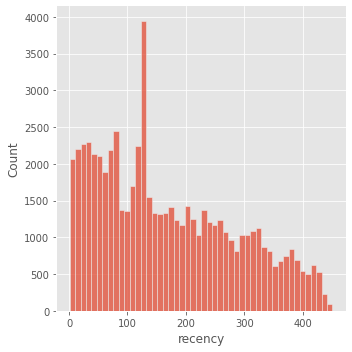

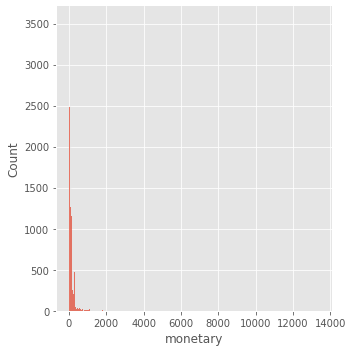

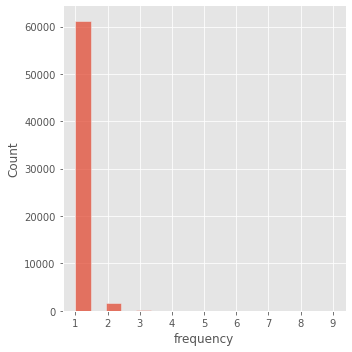

In [106]:
#lets check the distributions, to split the to kinda similar groups recency seems to be ok 3 quantiles would be used,
#for monetary  we will use 3 quantiles as well,
#frequency seems heavily impacted by the fact that most of users made only one order, 
#so we need to make 2 groups with hardcoded distribution, and we will see more than 1 sale to the same customer
#as an absolute win by our sales team
sns.displot(df_rfm.recency)
sns.displot(df_rfm.monetary)
sns.displot(df_rfm.frequency)

In [107]:
quintiles = df_rfm[['recency', 'frequency', 'monetary']].quantile([.33, .66]).to_dict()
quintiles

{'recency': {0.33: 94.0, 0.66: 213.0},
 'frequency': {0.33: 1.0, 0.66: 1.0},
 'monetary': {0.33: 56.99, 0.66: 123.0}}

In [108]:
#so we get following clusters
# 111: Recency is more 213 days, Frequency is only one order, and LTV is less 56.99 
# 112: Recency is more 213 days, Frequency is only one order, and LTV is between 56.99 and 124
# 113: Recency is more 213 days, Frequency is only one order, and LTV is more than 124
# 121: Recency is more 213 days, Frequency is more than one order, and LTV is less 56.99 
# 122: Recency is more 213 days, Frequency is more than one order, and LTV is between 56.99 and 124
# 123: Recency is more 213 days, Frequency is more than one order, and LTV is more than 124
# 211: Recency is between 213 days and 94 days, Frequency is only one order, and LTV is less 56.99 
# 212: Recency is between 213 days and 94 days, Frequency is only one order, and LTV is between 56.99 and 124
# 213: Recency is between 213 days and 94 days, Frequency is only one order, and LTV is more than 124
# 221: Recency is between 213 days and 94 days, Frequency is more than one order, and LTV is less 56.99 
# 222: Recency is between 213 days and 94 days, Frequency is more than one order, and LTV is between 56.99 and 124
# 223: Recency is between 213 days and 94 days, Frequency is more than one order, and LTV is more than 124
# 311: Recency is less than 94 days, Frequency is only one order, and LTV is less 56.99 
# 312: Recency is less than 94 days, Frequency is only one order, and LTV is between 56.99 and 124
# 313: Recency is less than 94 days, Frequency is only one order, and LTV is more than 124
# 321: Recency is less than 94 days, Frequency is more than one order, and LTV is less 56.99
# 322: Recency is less than 94 days, Frequency is more than one order, and LTV is between 56.99 and 124
# 323: Recency is less than 94 days, Frequency is more than one order, and LTV is more than 124


In [109]:
def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 3
    elif x <= quintiles['recency'][.66]:
        return 2
    else:
        return 1

def m_score(x, c):
    if x <= quintiles[c][.33]:
        return 1
    elif x <= quintiles[c][.66]:
        return 2
    else:
        return 3
    
def f_score(x, c):
    if x == 1:
        return 1
    else:
        return 2

df_rfm['R'] = df_rfm['recency'].apply(lambda x: r_score(x))
df_rfm['F'] = df_rfm['frequency'].apply(lambda x: f_score(x, 'frequency'))
df_rfm['M'] = df_rfm['monetary'].apply(lambda x: m_score(x, 'monetary'))
df_rfm['RFM Score'] = df_rfm['R'].map(str) + df_rfm['F'].map(str) + df_rfm['M'].map(str)
df_rfm

customer_unique_id  recency  monetary  frequency  R  F  \
0      0000f46a3911fa3c0805444483337064      387     69.00          1  1  1   
1      0000f6ccb0745a6a4b88665a16c9f078      171     25.99          1  2  1   
2      0004aac84e0df4da2b147fca70cf8255      138    180.00          1  2  1   
3      00053a61a98854899e70ed204dd4bafe       32    382.00          1  3  1   
4      0005e1862207bf6ccc02e4228effd9a0      393    135.00          1  1  1   
...                                 ...      ...       ...        ... .. ..   
65128  fffbf87b7a1a6fa8b03f081c5f51a201       95    149.00          1  2  1   
65129  fffcf5a5ff07b0908bd4e2dbc735a684      297   1570.00          1  1  1   
65130  fffea47cd6d3cc0a88bd621562a9d061      112     64.89          1  2  1   
65131  ffff371b4d645b6ecea244b27531430a      418     89.90          1  1  1   
65132  ffffd2657e2aad2907e67c3e9daecbeb      334     56.99          1  1  1   

       M RFM Score  
0      2       112  
1      1       211  
2      3       213  
3      3       313  
4      3       113  
...   ..       ...  
65128  3       213  
65129  3       113  
65130  2       212  
65131  2       112  
65132  1       111  

[63063 rows x 8 columns]

In [110]:
segt_map = {
    r'1[1-2][1-2]': 'hibernating', #bought some cheap stuff almost a year ago 
    r'1[1-2]3': 'lost whale', #someone who has the money but we lost them
    r'2[1-2]3': 'about to lose a whale', #no purchases for the last quarter but still ready to pay probably
    r'2[1-2][1-2]': 'about to sleep',  #no purchases in last quarter doesnot spend much
    r'31[1-2]': 'new customers', #first purchase - cheap stuff
    r'32[1-2]': 'loyal but poor', # made more than one purchase and still with us
    r'313': 'promising', # ready to spend and still does not hate us
    r'323': 'champions', # amazing people buying more than one time for huge sums
}

df_rfm['Segment'] = df_rfm['R'].map(str) + df_rfm['F'].map(str) + df_rfm['M'].map(str)
df_rfm['Segment'] = df_rfm['Segment'].replace(segt_map, regex=True)
df_rfm.head()

customer_unique_id  recency  monetary  frequency  R  F  M  \
0  0000f46a3911fa3c0805444483337064      387     69.00          1  1  1  2   
1  0000f6ccb0745a6a4b88665a16c9f078      171     25.99          1  2  1  1   
2  0004aac84e0df4da2b147fca70cf8255      138    180.00          1  2  1  3   
3  00053a61a98854899e70ed204dd4bafe       32    382.00          1  3  1  3   
4  0005e1862207bf6ccc02e4228effd9a0      393    135.00          1  1  1  3   

  RFM Score                Segment  
0       112            hibernating  
1       211         about to sleep  
2       213  about to lose a whale  
3       313              promising  
4       113             lost whale

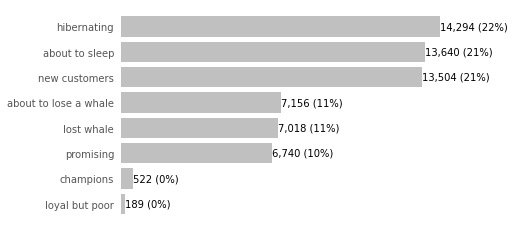

In [111]:
segments_counts = df_rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

graph shows that we have almost none loyal customers, even the customers which are ready to spend money never come back
